In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.utils import np_utils

In [1]:
from google.colab import drive 
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
import numpy as np
my_imgs = np.load('/content/drive/MyDrive/Milestone 3/new-images2.npy',  allow_pickle = True)
letters = np.load('/content/drive/MyDrive/Milestone 3/new-labels2.npy',  allow_pickle = True)

In [3]:
labels = [ord(i)-97 for i in letters] #pre-processing
my_labels = np.array(labels)
print(len(my_labels))

3639


In [4]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [5]:
import cv2
import numpy as np
jill = np.empty((3639, 224, 224, 3))
for i in range(3639):
  jill[i] = expand_greyscale_image_channels(cv2.resize(my_imgs[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR))

In [6]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94765736/94765736 [==============================] - 5s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(26, activation='sigmoid'))

In [9]:
#base_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = "sparse_categorical_crossentropy", metrics = ['acc'])
base_model.compile(optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=0.0001), loss = "sparse_categorical_crossentropy", metrics = ['acc'])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(jill, my_labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
history = base_model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))

Epoch 1/20
69/69 [==============================] - 29s 102ms/step - loss: 9.7341 - acc: 0.0792 - val_loss: 10.9597 - val_acc: 0.0728
Epoch 2/20
69/69 [==============================] - 5s 69ms/step - loss: 5.8730 - acc: 0.2071 - val_loss: 10.2652 - val_acc: 0.0673
Epoch 3/20
69/69 [==============================] - 5s 68ms/step - loss: 3.8401 - acc: 0.3775 - val_loss: 7.6637 - val_acc: 0.1635
Epoch 4/20
69/69 [==============================] - 5s 69ms/step - loss: 2.5524 - acc: 0.5140 - val_loss: 5.9430 - val_acc: 0.2376
Epoch 5/20
69/69 [==============================] - 5s 69ms/step - loss: 1.6958 - acc: 0.6445 - val_loss: 4.7476 - val_acc: 0.3255
Epoch 6/20
69/69 [==============================] - 5s 68ms/step - loss: 1.1043 - acc: 0.7251 - val_loss: 4.5275 - val_acc: 0.3544
Epoch 7/20
69/69 [==============================] - 5s 68ms/step - loss: 0.7494 - acc: 0.7861 - val_loss: 3.2768 - val_acc: 0.4547
Epoch 8/20
69/69 [==============================] - 5s 69ms/step - loss: 0.5019

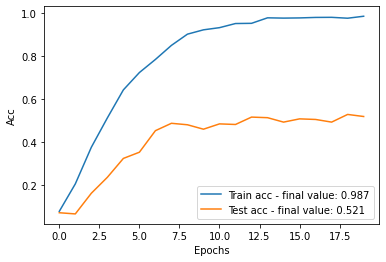

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']; val_acc = history.history['val_acc']
plt.plot(acc, label="Train acc - final value: %.3f"%acc[-1])
plt.plot(val_acc, label="Test acc - final value: %.3f"%val_acc[-1])
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("Acc"); plt.show()

In [13]:
base_model.evaluate(X_test, y_test, verbose = 2)

23/23 - 0s - loss: 2.9748 - acc: 0.4876 - 500ms/epoch - 22ms/step


[2.974757671356201, 0.48763737082481384]